In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import pathlib

In [3]:
try:
    import matplotlib_views as views
except ModuleNotFoundError:
    cwd = pathlib.Path().resolve().parent
    sys.path.append(str(cwd))
    import matplotlib_views as views

In [4]:
from matplotlib_views import histograms

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
from matplotlib import patheffects

## Create some fake data

In [8]:
views.set_global_style()

## Create figure

Text(0.5, 0.05, '"Stove Ownership" from xkcd by Randall Munroe')

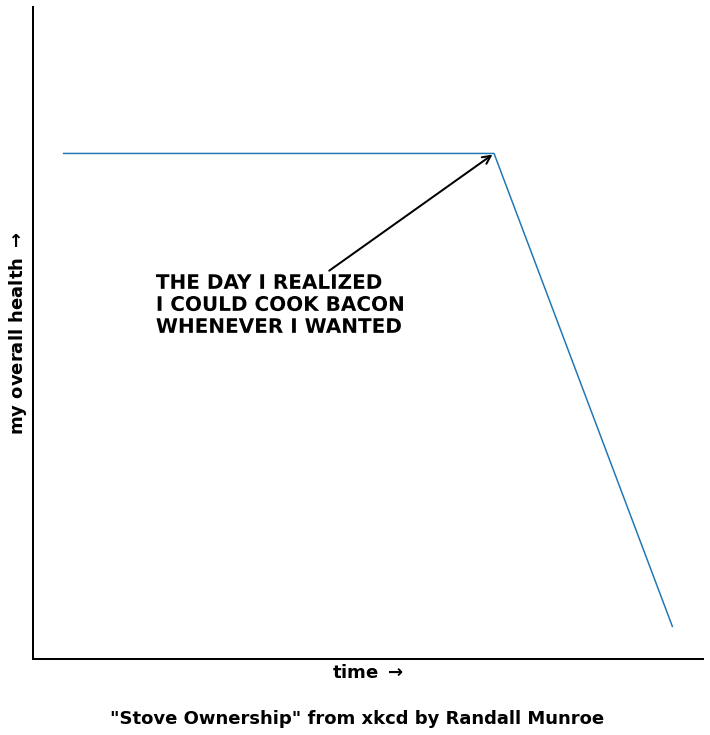

In [9]:
# with plt.xkcd():
#fig = plt.figure()
#ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))

fig, ax = views.get_plot()

ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim([-30, 10])

data = np.ones(100)
data[70:] -= np.arange(30)

ax.annotate(
    'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
    xy=(70, 1), arrowprops=dict(arrowstyle='->', lw=2), xytext=(15, -10), size=20,
    path_effects=[patheffects.withStroke(linewidth=3, foreground="w")]
)

ax.plot(data)

ax.set_xlabel(r'time $\rightarrow$')
#ax.set_xlabel(r'$\rho/\rho_{ref}\;\rightarrow$', color='red')
ax.set_ylabel(r'my overall health $\rightarrow$')
fig.text(
    0.5,
    0.05,
    '"Stove Ownership" from xkcd by Randall Munroe',
    ha='center'
)

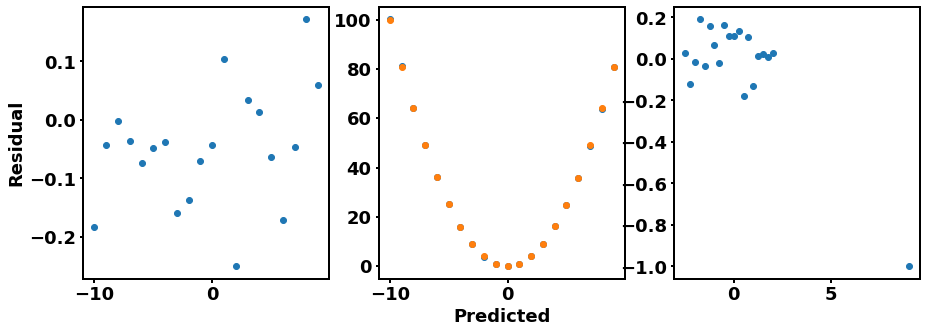

In [49]:
size = 5
n_ax = 3
fig, axs = plt.subplots(1, n_ax, sharey=False, sharex=False, figsize=(n_ax * size, size))

x_axis = np.arange(-10, 10)
n_points = len(x_axis)


mu, sigma = 0, 0.1 # mean and standard deviation
residuals_random = np.random.normal(mu, sigma, n_points)
axs[0].scatter(x_axis, residuals_random)
axs[0].set_ylabel("Residual")


mu, sigma = 0, 0.1 # mean and standard deviation
residuals_nonlinear = x_axis**2 + np.random.normal(mu, sigma, n_points)
axs[1].scatter(x_axis, residuals_nonlinear)
axs[1].set_xlabel("Predicted")


mu, sigma = 0, 0.1 # mean and standard deviation
residuals_nonlinear = x_axis**2 + np.random.normal(mu, sigma, n_points)
axs[1].scatter(x_axis, residuals_nonlinear)
axs[1].set_xlabel("Predicted")


mu, sigma = 0, 0.1 # mean and standard deviation
residuals_nonlinear = np.random.normal(mu, sigma, n_points)
residuals_nonlinear[-1] = -1
x_axis_limit = x_axis/4
x_axis_limit[-1] = x_axis[-1]
axs[2].scatter(x_axis_limit, residuals_nonlinear)


axs[0].

